<b>이미지 라벨링</b><br>
라벨링 파일(메터데이터)와 이미지 파일을 파일을 별도로 작업<br>
파일명으로 매칭

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 2  # 자전거, 전기자전거

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
# 메타데이터 파일 읽기
metadata_path = '/content/image_labels.b.e.csv'
metadata_df = pd.read_csv(metadata_path)

# 이미지 파일명과 레이블 매핑
file_paths = metadata_df['image_name'].apply(lambda x: os.path.join('/content/drive/MyDrive/CNN/m_c/b.e', x))
labels = metadata_df['class'].map({'c': 0, 'b': 1}).values

# 이미지 로드 및 벡터화
image_vector = []
labels_vector = []

# 각 이미지에 대해 루프를 실행
for file_path, label in zip(file_paths, labels):
    # 파일 존재 여부 확인
    if not os.path.exists(file_path):
        print(f'파일이 존재하지 않습니다: {file_path}')
        continue  # 파일이 없으면 건너뛰기
    try:
        # 이미지 로드 및 벡터화
        img = image.load_img(file_path, target_size=(IMG_ROWS, IMG_COLS))
        img_array = image.img_to_array(img)
        image_vector.append(img_array)
        labels_vector.append(label)
    except Exception as e:
        print(f'이미지 로딩 중 오류 발생: {file_path}, 에러: {e}')


파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_13.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_97.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_144.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_147.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_152.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_153.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_154.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_155.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_156.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_157.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_158.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_159.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_160.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_161.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_162.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/m_c/b.e/b_163.jpg
파일이 존재하지 않습니다: /content/drive/MyDrive/CNN/

In [ ]:
image_vector[0]

In [13]:
image_vector[0].shape

(64, 64, 3)

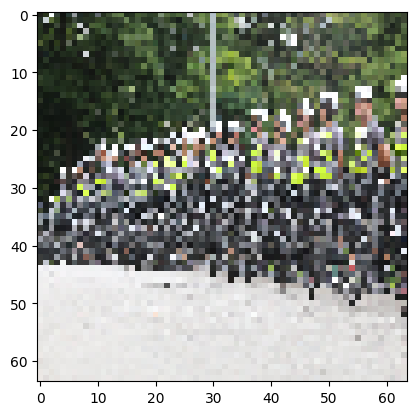

In [14]:
plt.imshow(image_vector[0]/255)

In [28]:
# numpy 배열로 변환
image_vector = np.array(image_vector)
labels_vector = np.array(labels_vector)

In [29]:
y = labels_vector

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [31]:
X_train.shape

(243, 64, 64, 3)

In [32]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [19]:
y_train[200]

0

In [33]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                984096    
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                      

In [34]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
2/2 [==============================] - 2s 524ms/step - loss: 2.0327 - accuracy: 0.4817 - val_loss: 1.6606 - val_accuracy: 0.4000
Epoch 2/50
2/2 [==============================] - 1s 481ms/step - loss: 1.3394 - accuracy: 0.5138 - val_loss: 1.0852 - val_accuracy: 0.4000
Epoch 3/50
2/2 [==============================] - 1s 492ms/step - loss: 1.0447 - accuracy: 0.5505 - val_loss: 0.9788 - val_accuracy: 0.4000
Epoch 4/50
2/2 [==============================] - 1s 538ms/step - loss: 0.8187 - accuracy: 0.4954 - val_loss: 0.7013 - val_accuracy: 0.5600
Epoch 5/50
2/2 [==============================] - 1s 498ms/step - loss: 0.6550 - accuracy: 0.7156 - val_loss: 0.6795 - val_accuracy: 0.5200
Epoch 6/50
2/2 [==============================] - 1s 288ms/step - loss: 0.6341 - accuracy: 0.7844 - val_loss: 0.6793 - val_accuracy: 0.5600
Epoch 7/50
2/2 [==============================] - 1s 314ms/step - loss: 0.6312 - accuracy: 0.7431 - val_loss: 0.7634 - val_accuracy: 0.6000
Epoch 8/50
2/2 [====

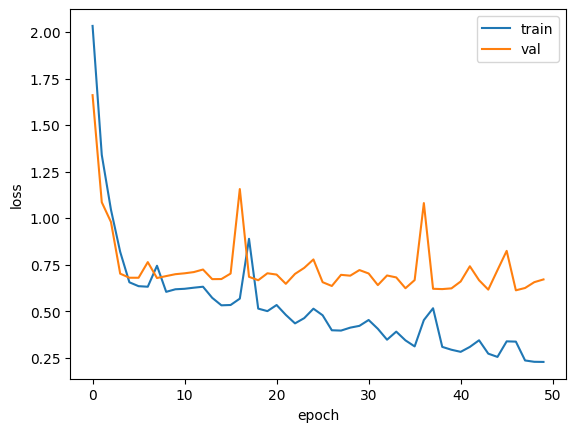

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

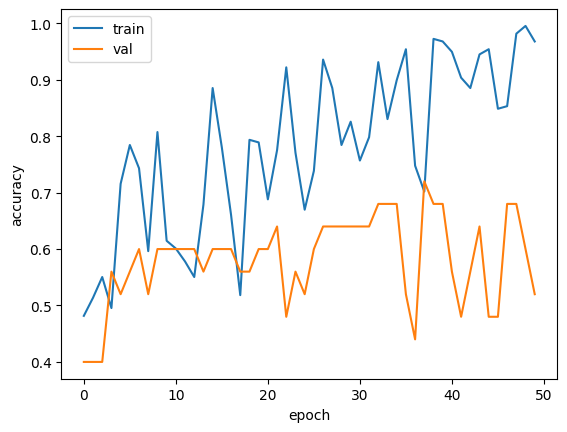

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [37]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 27ms/step - loss: 0.6099 - accuracy: 0.6721

Test loss: 0.609893262386322
Test accuracy: 0.6721311211585999
